
Dataset Overview:
First 10 rows:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3     

<ipython-input-14-227d10b030ab>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='viridis')


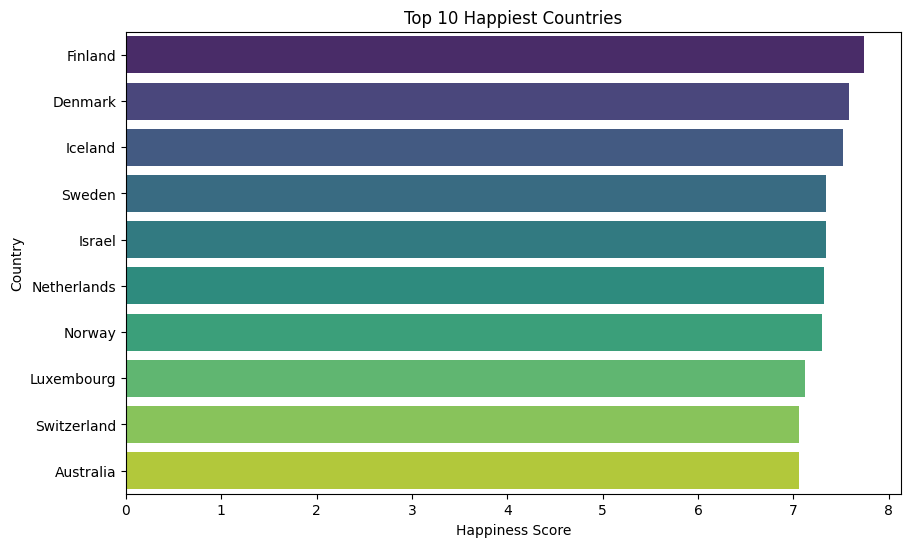

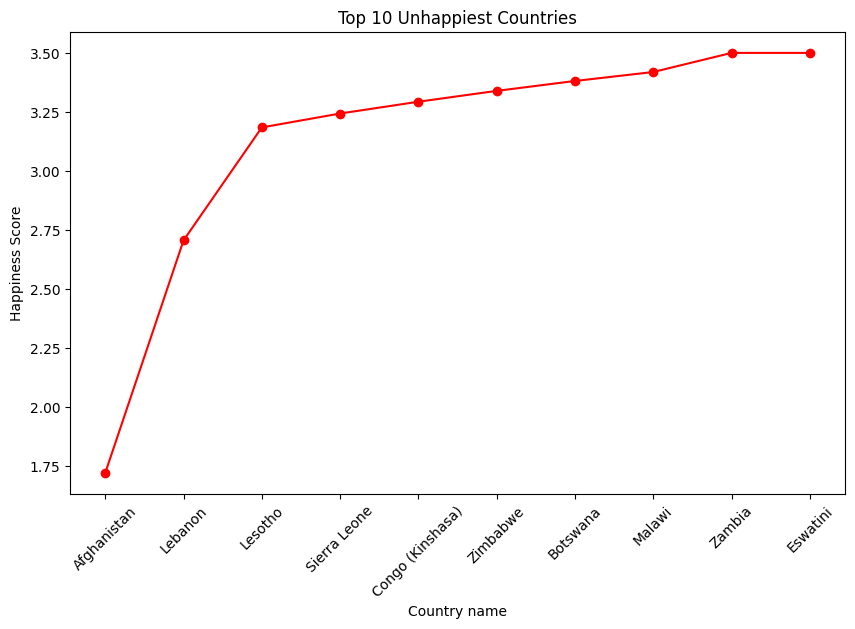

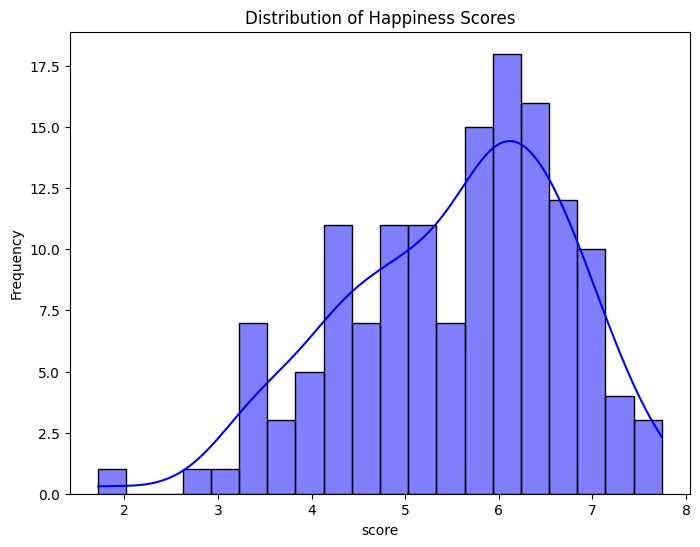

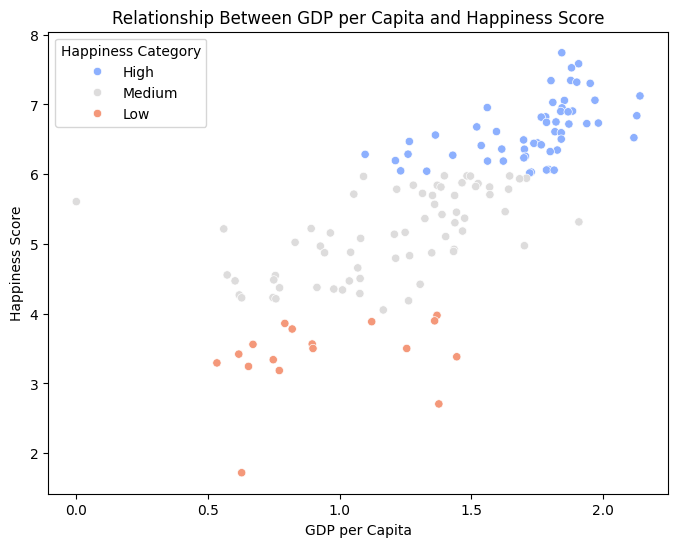


Program completed.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/WHR-2024-5CS037.csv')

# 1. Data Exploration and Understanding

# Dataset Overview
print("\nDataset Overview:")
print("First 10 rows:")
print(df.head(10))

print(f"\nNumber of Rows: {df.shape[0]}, Number of Columns: {df.shape[1]}")
print("\nColumn Names and Data Types:")
print(df.dtypes)

# Ensure column names are clean and consistent
df.rename(columns=lambda x: x.strip(), inplace=True)

# Check for the presence of the 'Score' column
if 'score' not in df.columns:
    raise KeyError("The column 'score' does not exist in the dataset. Please verify the dataset.")

# Convert 'Score' column to numeric in case of data issues
df['score'] = pd.to_numeric(df['score'], errors='coerce')

# Handle missing values in 'Score'
if df['score'].isnull().any():
    print("\nWarning: Missing values detected in 'score'. Filling with the mean.")
    df['score'].fillna(df['score'].mean(), inplace=True)

# Basic Statistics
mean_score = df['score'].mean()
median_score = df['score'].median()
std_score = df['score'].std()

print(f"\nBasic Statistics for 'score':")
print(f"Mean: {mean_score}, Median: {median_score}, Standard Deviation: {std_score}")

highest_score_country = df.loc[df['score'].idxmax(), 'Country name']
lowest_score_country = df.loc[df['score'].idxmin(), 'Country name']

print(f"Country with Highest Score: {highest_score_country}")
print(f"Country with Lowest Score: {lowest_score_country}")

# Missing Values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# Filtering and Sorting
filtered_df = df[df['score'] > 7.5]
sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)

print("\nTop 10 Countries with Score > 7.5 Sorted by GDP per Capita:")
print(sorted_df.head(10))

# Adding New Columns
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(categorize_happiness)

# 2. Data Visualizations

# Bar Plot: Top 10 Happiest Countries
top_10_happiest = df.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='viridis')
plt.title('Top 10 Happiest Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

# Line Plot: Top 10 Unhappiest Countries
top_10_unhappiest = df.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', linestyle='-', color='red')
plt.title('Top 10 Unhappiest Countries')
plt.xlabel('Country name')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

# Histogram: Distribution of Scores
plt.figure(figsize=(8, 6))
sns.histplot(df['score'], kde=True, bins=20, color='blue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('score')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot: GDP per Capita vs. Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df, hue='Happiness Category', palette='coolwarm')
plt.title('Relationship Between GDP per Capita and Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Happiness Category')
plt.show()

print("\nProgram completed.")


<ipython-input-22-b34853bdeb8d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['score'] = (
<ipython-input-22-b34853bdeb8d>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


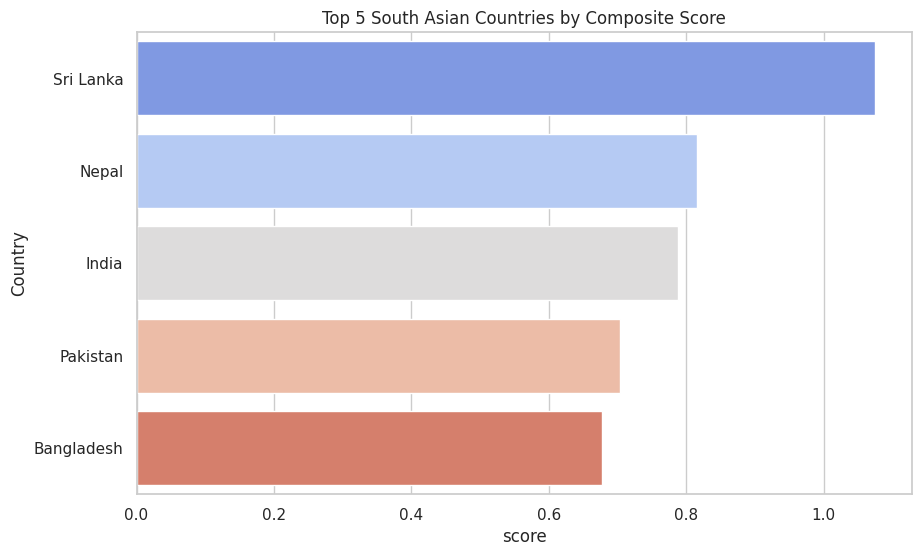

<Figure size 1000x600 with 0 Axes>

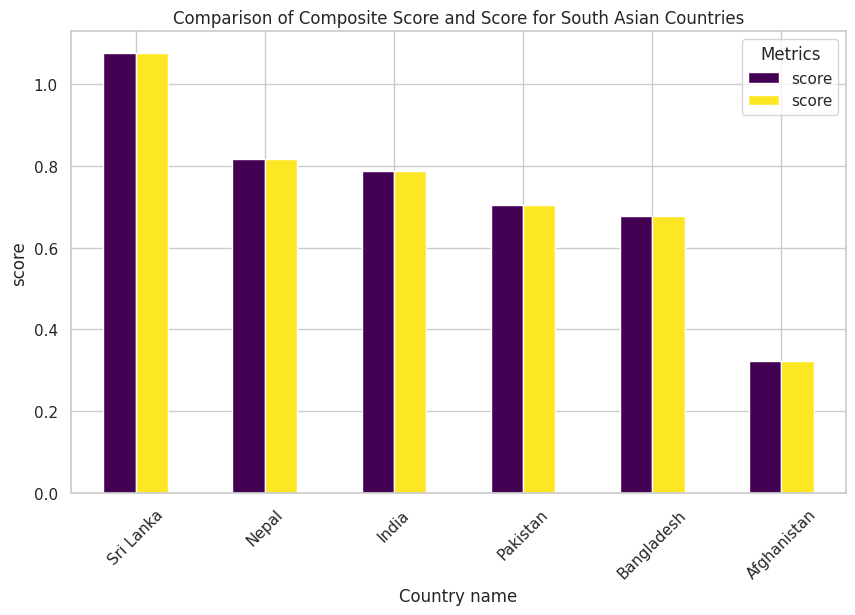

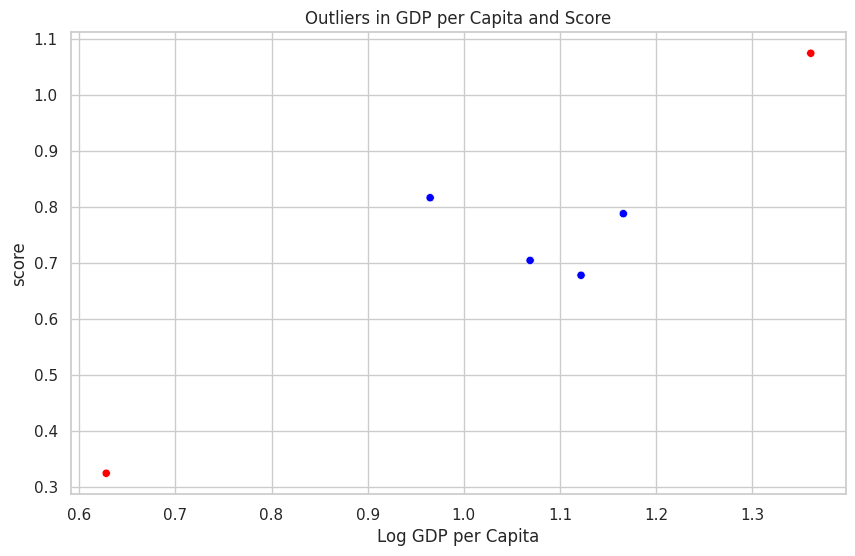

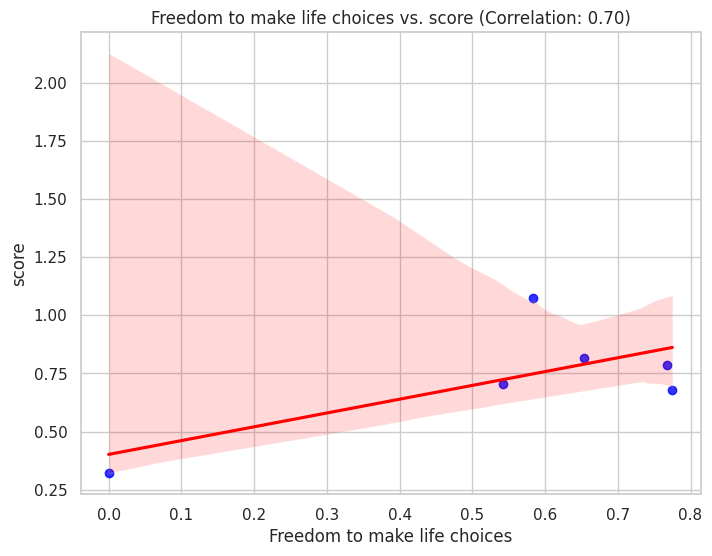

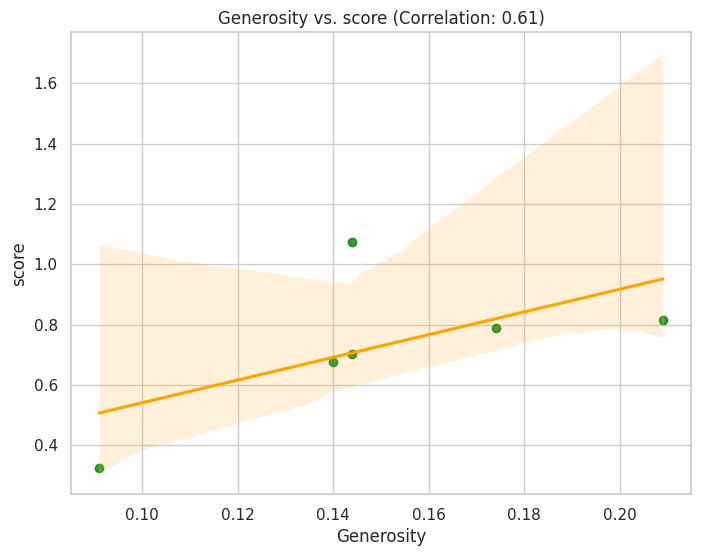

<ipython-input-22-b34853bdeb8d>:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


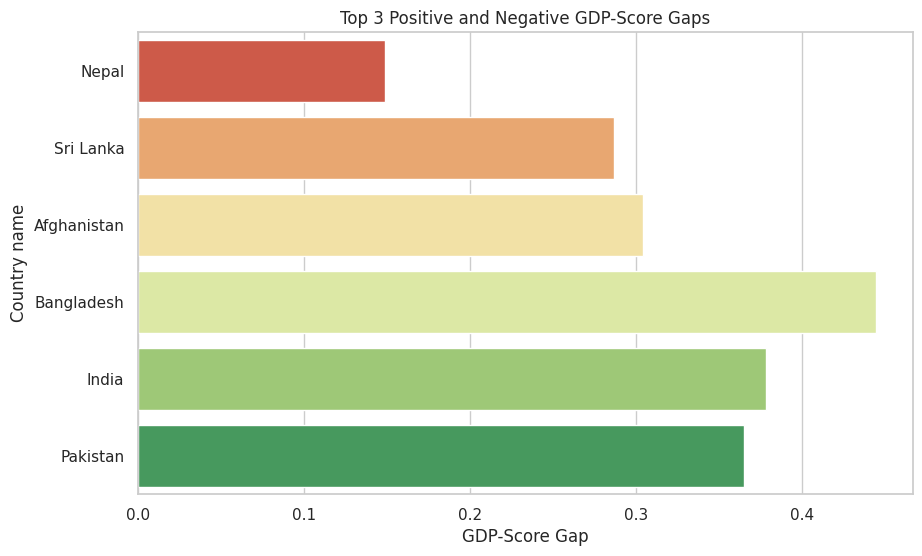


Analysis completed.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/WHR-2024-5CS037.csv')

# Task 1 - Preparing the South-Asia Dataset
# Step 1: Define South Asian countries
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Step 2: Filter the dataset for South Asian countries
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

# Step 3: Save the filtered dataframe as a CSV file
south_asia_df.to_csv('/content/South_Asia_Happiness.csv', index=False)

# Task 2 - Composite Score Ranking
# Step 1: Create a Composite Score column
south_asia_df['score'] = (
    0.40 * south_asia_df['Log GDP per capita'] +
    0.30 * south_asia_df['Social support'] +
    0.30 * south_asia_df['Healthy life expectancy']
)

# Step 2: Rank countries by Composite Score
south_asia_df = south_asia_df.sort_values(by='score', ascending=False)

# Step 3: Visualize the top 5 countries using a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='score',
    y='Country name',
    data=south_asia_df.head(5),
    palette='coolwarm'
)
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('score')
plt.ylabel('Country')
plt.show()

# Step 4: Compare rankings based on Composite Score and Score
plt.figure(figsize=(10, 6))
south_asia_df.set_index('Country name')[['score', 'score']].plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Comparison of Composite Score and Score for South Asian Countries')
plt.xlabel('Country name')
plt.ylabel('score')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()

# Task 3 - Outlier Detection
# Step 1: Identify outliers based on Score and GDP per Capita
q1_gdp = south_asia_df['Log GDP per capita'].quantile(0.25)
q3_gdp = south_asia_df['Log GDP per capita'].quantile(0.75)
iqr_gdp = q3_gdp - q1_gdp

q1_score = south_asia_df['score'].quantile(0.25)
q3_score = south_asia_df['score'].quantile(0.75)
iqr_score = q3_score - q1_score

lower_gdp = q1_gdp - 1.5 * iqr_gdp
upper_gdp = q3_gdp + 1.5 * iqr_gdp

lower_score = q1_score - 1.5 * iqr_score
upper_score = q3_score + 1.5 * iqr_score

outliers = south_asia_df[(south_asia_df['Log GDP per capita'] < lower_gdp) | (south_asia_df['Log GDP per capita'] > upper_gdp) |
                         (south_asia_df['score'] < lower_score) | (south_asia_df['score'] > upper_score)]

# Step 3: Scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Log GDP per capita',
    y='score',
    data=south_asia_df,
    hue=south_asia_df.index.isin(outliers.index),
    palette={True: 'red', False: 'blue'},
    legend=False
)
plt.title('Outliers in GDP per Capita and Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('score')
plt.show()

# Task 4 - Exploring Trends Across Metrics
# Step 1: Calculate correlations
freedom_corr = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'])
generosity_corr = south_asia_df['Generosity'].corr(south_asia_df['score'])

# Step 2: Scatter plots with trendlines
plt.figure(figsize=(8, 6))
sns.regplot(
    x='Freedom to make life choices',
    y='score',
    data=south_asia_df,
    scatter_kws={'color': 'blue'},
    line_kws={'color': 'red'}
)
plt.title(f'Freedom to make life choices vs. score (Correlation: {freedom_corr:.2f})')
plt.xlabel('Freedom to make life choices')
plt.ylabel('score')
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(
    x='Generosity',
    y='score',
    data=south_asia_df,
    scatter_kws={'color': 'green'},
    line_kws={'color': 'orange'}
)
plt.title(f'Generosity vs. score (Correlation: {generosity_corr:.2f})')
plt.xlabel('Generosity')
plt.ylabel('score')
plt.show()

# Task 5 - Gap Analysis
# Step 1: Add a GDP-Score Gap column
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

# Step 2: Rank by GDP-Score Gap
south_asia_df_asc = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)
south_asia_df_desc = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

# Step 3: Highlight top 3 countries with largest positive and negative gaps
plt.figure(figsize=(10, 6))
sns.barplot(
    x='GDP-Score Gap',
    y='Country name',
    data=pd.concat([south_asia_df_asc.head(3), south_asia_df_desc.head(3)]),
    palette='RdYlGn'
)
plt.title('Top 3 Positive and Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country name')
plt.show()

print("\nAnalysis completed.")



Descriptive Statistics:
South Asia - Mean Score: 3.90, Std Dev: 1.18
Middle East - Mean Score: 5.41, Std Dev: 1.57

The region with higher average happiness scores is: Middle East


<ipython-input-23-ee260889b7b9>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country name', x='score', data=pd.concat([top_3_sa, bottom_3_sa]), palette='viridis')
<ipython-input-23-ee260889b7b9>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country name', x='score', data=pd.concat([top_3_me, bottom_3_me]), palette='mako')


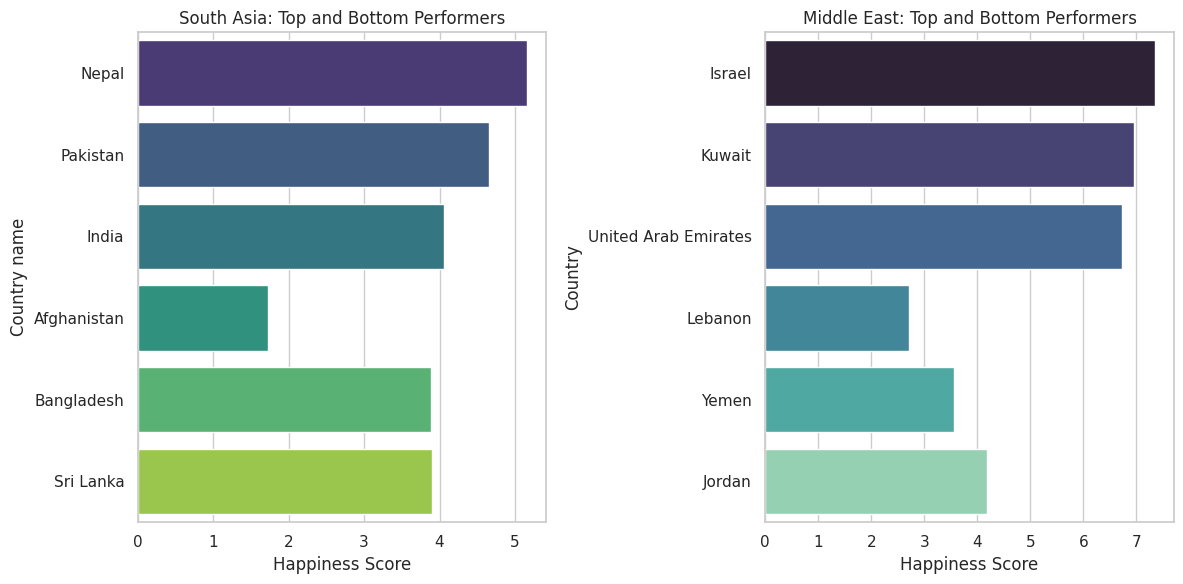

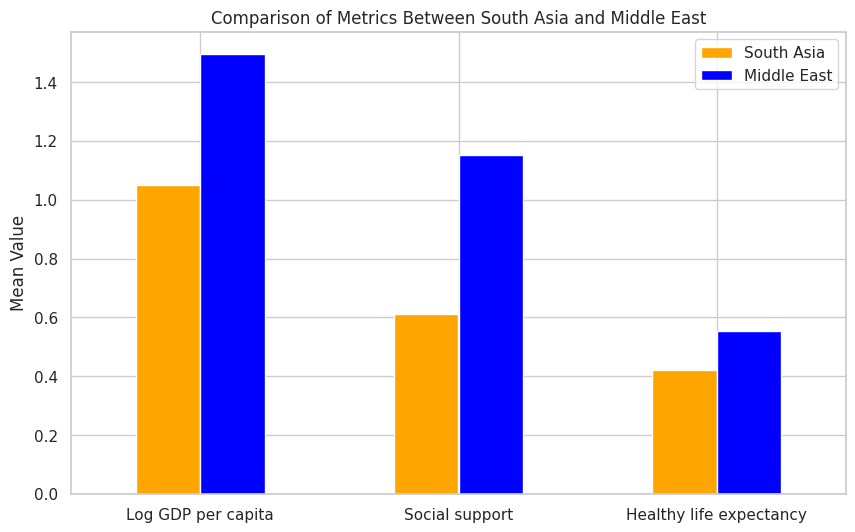

<ipython-input-23-ee260889b7b9>:72: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  largest_disparity = comparison_df.diff(axis=1).abs().idxmax()[0]
<ipython-input-23-ee260889b7b9>:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  largest_disparity = comparison_df.diff(axis=1).abs().idxmax()[0]



The metric with the largest disparity between regions is: nan

Happiness Disparity:
South Asia - Range: 3.44, Coefficient of Variation: 0.30
Middle East - Range: 4.63, Coefficient of Variation: 0.29
The region with greater variability in happiness is: South Asia

Correlation Analysis:
South Asia:
Freedom to make life choices    0.800519
Generosity                      0.874512
Name: score, dtype: float64

Middle East:
Freedom to make life choices    0.863220
Generosity                      0.627524
Name: score, dtype: float64


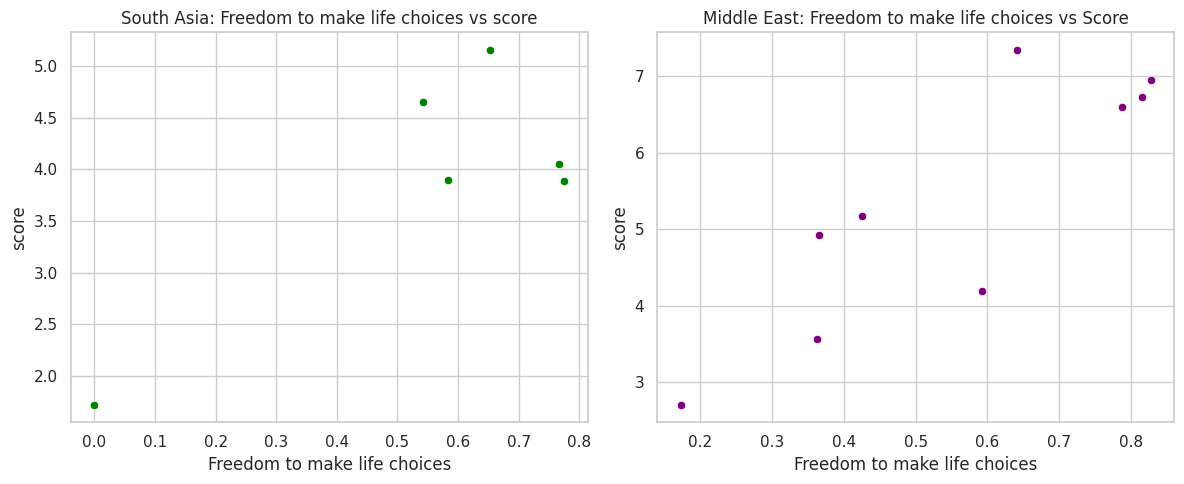

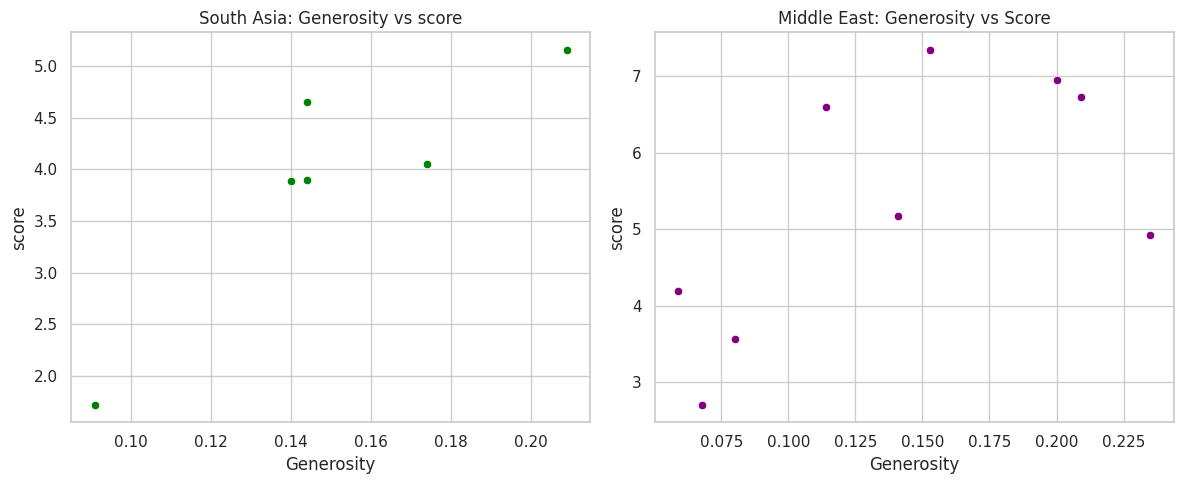

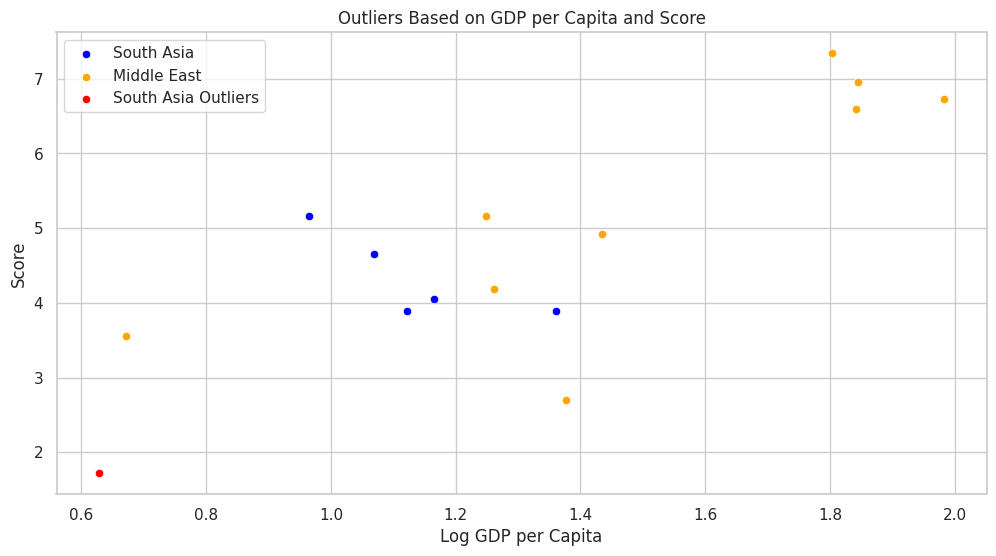

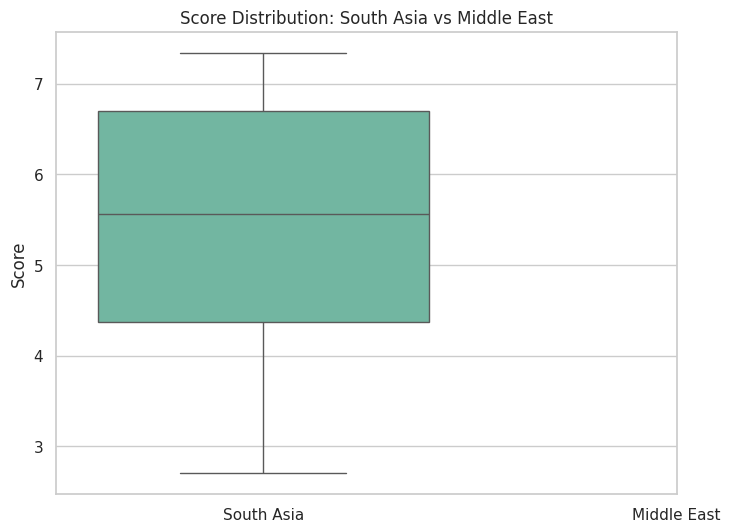


Analysis completed.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/WHR-2024-5CS037.csv')

# Define Middle East and South Asia countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# Filter datasets
south_asia_df = df[df['Country name'].isin(south_asian_countries)].copy()
middle_east_df = df[df['Country name'].isin(middle_east_countries)].copy()

# Save filtered data for future use
south_asia_df.to_csv('South_Asia_Dataset.csv', index=False)
middle_east_df.to_csv('Middle_East_Dataset.csv', index=False)

# Task 1: Descriptive Statistics
sa_mean = south_asia_df['score'].mean()
sa_std = south_asia_df['score'].std()
me_mean = middle_east_df['score'].mean()
me_std = middle_east_df['score'].std()

print("\nDescriptive Statistics:")
print(f"South Asia - Mean Score: {sa_mean:.2f}, Std Dev: {sa_std:.2f}")
print(f"Middle East - Mean Score: {me_mean:.2f}, Std Dev: {me_std:.2f}")

higher_region = "South Asia" if sa_mean > me_mean else "Middle East"
print(f"\nThe region with higher average happiness scores is: {higher_region}")

# Task 2: Top and Bottom Performers
top_3_sa = south_asia_df.nlargest(3, 'score')[['Country name', 'score']]
bottom_3_sa = south_asia_df.nsmallest(3, 'score')[['Country name', 'score']]

top_3_me = middle_east_df.nlargest(3, 'score')[['Country name', 'score']]
bottom_3_me = middle_east_df.nsmallest(3, 'score')[['Country name', 'score']]

# Plot Top and Bottom Performers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(y='Country name', x='score', data=pd.concat([top_3_sa, bottom_3_sa]), palette='viridis')
plt.title('South Asia: Top and Bottom Performers')
plt.xlabel('Happiness Score')
plt.ylabel('Country name')

plt.subplot(1, 2, 2)
sns.barplot(y='Country name', x='score', data=pd.concat([top_3_me, bottom_3_me]), palette='mako')
plt.title('Middle East: Top and Bottom Performers')
plt.xlabel('Happiness Score')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

# Task 3: Metric Comparisons
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

sa_means = south_asia_df[metrics].mean()
me_means = middle_east_df[metrics].mean()

comparison_df = pd.DataFrame({'South Asia': sa_means, 'Middle East': me_means})
comparison_df.plot(kind='bar', figsize=(10, 6), color=['orange', 'blue'])
plt.title('Comparison of Metrics Between South Asia and Middle East')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.show()

largest_disparity = comparison_df.diff(axis=1).abs().idxmax()[0]
print(f"\nThe metric with the largest disparity between regions is: {largest_disparity}")

# Task 4: Happiness Disparity
sa_range = south_asia_df['score'].max() - south_asia_df['score'].min()
me_range = middle_east_df['score'].max() - middle_east_df['score'].min()

sa_cv = sa_std / sa_mean
me_cv = me_std / me_mean

print("\nHappiness Disparity:")
print(f"South Asia - Range: {sa_range:.2f}, Coefficient of Variation: {sa_cv:.2f}")
print(f"Middle East - Range: {me_range:.2f}, Coefficient of Variation: {me_cv:.2f}")

higher_variability = "South Asia" if sa_cv > me_cv else "Middle East"
print(f"The region with greater variability in happiness is: {higher_variability}")

# Task 5: Correlation Analysis
metrics_to_correlate = ['Freedom to make life choices', 'Generosity']

correlations_sa = south_asia_df[metrics_to_correlate + ['score']].corr()['score'].drop('score')
correlations_me = middle_east_df[metrics_to_correlate + ['score']].corr()['score'].drop('score')

print("\nCorrelation Analysis:")
print("South Asia:")
print(correlations_sa)
print("\nMiddle East:")
print(correlations_me)

# Scatter Plots
for metric in metrics_to_correlate:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=metric, y='score', data=south_asia_df, color='green')
    plt.title(f'South Asia: {metric} vs score')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=metric, y='score', data=middle_east_df, color='purple')
    plt.title(f'Middle East: {metric} vs Score')

    plt.tight_layout()
    plt.show()

# Task 6: Outlier Detection
q1_sa, q3_sa = south_asia_df['score'].quantile([0.25, 0.75])
q1_me, q3_me = middle_east_df['score'].quantile([0.25, 0.75])

iqr_sa = q3_sa - q1_sa
iqr_me = q3_me - q1_me

outliers_sa = south_asia_df[(south_asia_df['score'] < (q1_sa - 1.5 * iqr_sa)) | (south_asia_df['score'] > (q3_sa + 1.5 * iqr_sa))]
outliers_me = middle_east_df[(middle_east_df['score'] < (q1_me - 1.5 * iqr_me)) | (middle_east_df['score'] > (q3_me + 1.5 * iqr_me))]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_df, label='South Asia', color='blue')
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_df, label='Middle East', color='orange')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_sa, label='South Asia Outliers', color='red')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_me, label='Middle East Outliers', color='purple')
plt.title('Outliers Based on GDP per Capita and Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.show()

# Task 7: Boxplot for Score Distribution
plt.figure(figsize=(8, 6))
sns.boxplot(data=[south_asia_df['score'], middle_east_df['score']], palette='Set2')
plt.xticks([0, 1], ['South Asia', 'Middle East'])
plt.title('Score Distribution: South Asia vs Middle East')
plt.ylabel('Score')
plt.show()

print("\nAnalysis completed.")
